# Actividad 3: M2003B
Author: A. Ramirez-Morales (andres.ramirez@tec.mx)

## Instrucciones:
- Active el kernel proveniente de `Anaconda`
- Complete las funciones donde vea líneas de código inconclusas
- Use comentarios para documentar de manera integral sus funciones
- Pruebe sus funciones con distintos parámetros
- Aumente las explicaciones en el Markdown y en el código
- Procure NO usar chatGPT ú otra tecnología similar, usted tiene la capacidad intelectual suficiente para resolverlo por usted mismo
- Use la documentación oficial de las librerías que se utilizan
- Se entrega un archivo PDF CANVAS como lo indique el profesor


In [1]:
# cargar librerías básicas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

##
## 1. Regresión lineal - método analítico

### 1.1 Cargar y visualizar los datos

In [2]:
import pandas as pd
data = pd.read_csv('data/linear_tutorial/linear_data.csv')
X = data['X']
Y = data['Y']

### 1.2 Modelo lineal:
$$y_i = \beta_0 + \beta_1x_i + \epsilon_i$$

**Ejercicio:** Demuestre que:

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n x_i y_i - n \overline{x}\; \overline{y}}{\sum_{i=1}^n x_i^2 - n \overline{x}^2}
$$



**Ejercicio:** Complete la siguiente función para obtener los estimadores de $\beta_0,\: \sigma$, y $\beta_1$.

In [3]:
def simple_linear_regression(x, y):
    """
    Documentar correctamente
    
    """
    # convertir listas de entrada a arrays de numpy
    x = np.array(x)
    y = np.array(y)
    
    # calcular promedios de x, y
    x_mean = x.mean()
    y_mean = y.mean()

    # calcular numerador y denominador para beta_1
    n = len(x)
    numerator = np.sum(x*y - n*x_mean*y_mean)
    denominator = np.sum(x**2 - n*x_mean**2)
    
    # calcular beta_1 (pendiente)
    beta_1_estimador = numerator / denominator
    
    # calcular beta_0 (intersección)
    beta_0_estimador = y_mean - beta_1_estimador*x_mean

    # calcular valores predichos
    y_hat = beta_0_estimador + beta_1_estimador*x

    # calcular residuos
    residuals = y - y_hat
    
    # estimar sigma (desviación estándar de los errores)
    sigma_estimador = np.std(residuals)
    
    return beta_0_estimador, beta_1_estimador, sigma_estimador

Pruebe su función

In [4]:
beta_0_estimador, beta_1_estimador, sigma_estimador = simple_linear_regression(X, Y)
print(f"Estimador beta_0 (intercept): {beta_0_estimador}")
print(f"Estimador beta_1 (slope): {beta_1_estimador}")
print(f"Estimador sigma (error): {sigma_estimador}")

Estimador beta_0 (intercept): 7.105093498480214
Estimador beta_1 (slope): 0.3939176304081845
Estimador sigma (error): 57.2618882302448


###
### 1.3 Errores para los estimadores

**Ejercicio:** Escriba una función que calcule los errores de $\beta_0,\beta_1$

$$
SE(\hat{\beta}_1) = \frac{\hat{\sigma}}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}
$$

$$
SE(\hat{\beta}_0) = \hat{\sigma} \cdot \sqrt{ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2} }
$$

In [5]:

def calculate_standard_errors(x, sigma_hat):
    """
    Description:
    
    Parameters:

    Returns:
   
    """
    
    # calcular los valores medios
    x_mean = x.mean()
    n = len(x)  # numero de observaciones
    
    Sxx = np.sum((x - x_mean) ** 2)

    # estandard errors para beta_0 y beta_1
    se_beta_1 = sigma_hat / np.sqrt(Sxx)
    se_beta_0 = sigma_hat * np.sqrt(1/n + (x_mean**2) / Sxx)

    return se_beta_0, se_beta_1

In [6]:
se_beta_0, se_beta_1 = calculate_standard_errors(X, sigma_estimador)
print(f"Error on beta_0: {se_beta_0}")
print(f"Error on beta_1: {se_beta_1}")

Error on beta_0: 3.6234471889798066
Error on beta_1: 0.15250216499848743


###
### 1.4 Distribuciones para los estimadores
 Dado que los estimadores son no-cesgados y además por el TLC tienen distribuciones Gaussianas, es posible construir distribuciones para ellos.

**Ejercicio:** Escriba una función que obtenga dichas distribuciones usando los valores calculados en los ejercicios anteriores.
 

In [7]:
def generate_distributions(mean1, std1, mean2, std2, num_samples=1000, nu=2):
    """
    Agregar documentacion
    """
    # agregar comentario
    gaussian1 = np.random.normal(loc=mean1, scale=std1, size=num_samples)
    gaussian2 = np.random.normal(loc=mean2, scale=std2, size=num_samples)

    # agregar comentario [Sugerencia: usar np.random.chisquare()]
    chi2_dist = np.random.chisquare(df=nu, size=num_samples)

    return gaussian1, gaussian2, chi2_dist

Ejecute el código y haga gráficas de sus las distribuciones de los estimadores.

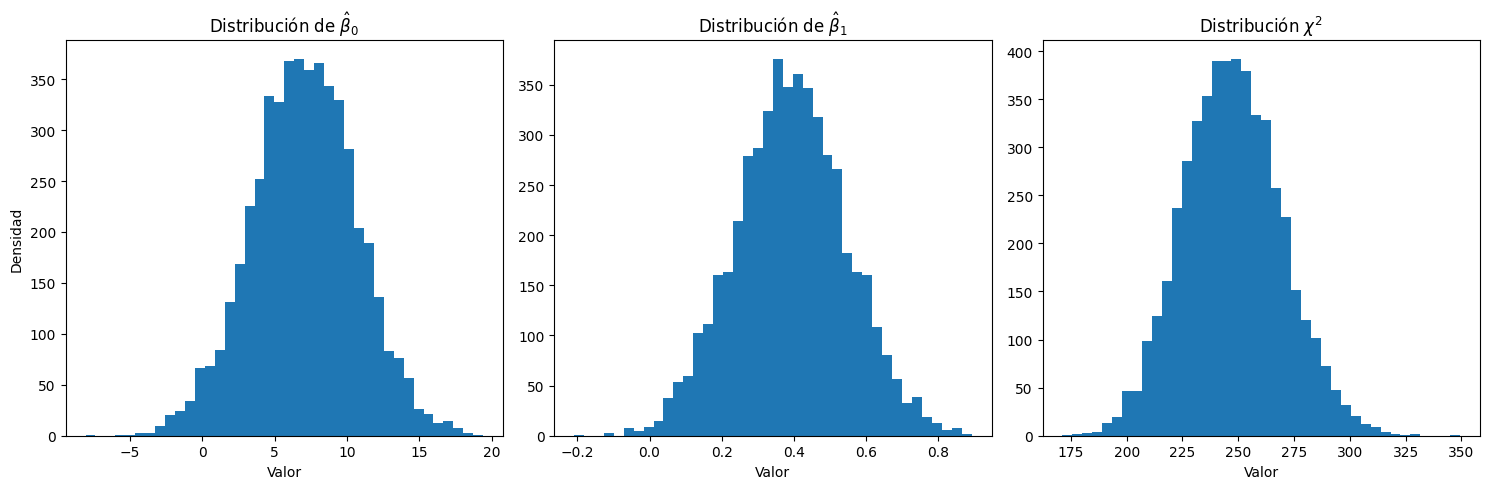

In [8]:
import numpy as np
import matplotlib.pyplot as plt

beta_0_estimador, beta_1_estimador, sigma_estimador = simple_linear_regression(X, Y)

se_b0, se_b1 = calculate_standard_errors(X, sigma_estimador)

gauss_b0, gauss_b1, chi2 = generate_distributions(
    mean1=beta_0_estimador, std1=se_b0,
    mean2=beta_1_estimador, std2=se_b1,
    num_samples=5000, nu=len(X)-2
)

plt.figure(figsize=(15,5))

# Distribución de beta_0
plt.subplot(1,3,1)
plt.hist(gauss_b0, bins=40)
plt.title(r"Distribución de $\hat{\beta}_0$")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Distribución de beta_1
plt.subplot(1,3,2)
plt.hist(gauss_b1, bins=40)
plt.title(r"Distribución de $\hat{\beta}_1$")
plt.xlabel("Valor")

# Distribución Chi-cuadrada
plt.subplot(1,3,3)
plt.hist(chi2, bins=40)
plt.title(r"Distribución $\chi^2$")
plt.xlabel("Valor")

plt.tight_layout()
plt.show()